# Trabajo 2 Opcional

 - Máster en Ciencia de Datos y Aprendizaje Automático.
 - Asignatura: Preparación de Datos.
 - Trabajo realizado por: Pablo Ascorbe e Ignacio Marco.
 - Fecha: --/01/2023.

## 1. Lectura y análisis del dataset

En este primer apartado importaremos los datos y haremos un estudio inicial de éstos.
Los datos se han conseguido en: https://zenodo.org/record/4265096#.Y7vcdBXMLct
<br><br>
Es un dataset que cuenta con 52.478 libros y 24 características, y cuyos datos están sacados de la lista de los mejores libros de GoodReads.

### 1.1. Importación de datos

In [105]:
import pandas as pd
import numpy as np

df = pd.read_csv('libros.csv', header=0, dtype=object)
print(df.shape)

(52478, 25)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bookId            52478 non-null  object
 1   title             52478 non-null  object
 2   series            23470 non-null  object
 3   author            52478 non-null  object
 4   rating            52478 non-null  object
 5   description       51140 non-null  object
 6   language          48672 non-null  object
 7   isbn              52478 non-null  object
 8   genres            52478 non-null  object
 9   characters        52478 non-null  object
 10  bookFormat        51005 non-null  object
 11  edition           4955 non-null   object
 12  pages             50131 non-null  object
 13  publisher         48782 non-null  object
 14  publishDate       51598 non-null  object
 15  firstPublishDate  31152 non-null  object
 16  awards            52478 non-null  object
 17  numRatings  

Vemos que tenemos demasiadas instancias y que podría estar bien reducir un poco para simplificar, pero de momento vamos a seguir con todos.

In [6]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [7]:
df.tail()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],...,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86
52477,10991547-daughter-of-helaman,Daughter of Helaman,Stripling Warrior #1,Misty Moncur (Goodreads Author),4.02,Fighting in Helaman's army is Keturah's deepes...,English,9781599554976,"['Lds Fiction', 'Historical Fiction', 'Young A...",[],...,NaN,[],246,"['106', '73', '42', '17', '8']",90,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.20


Vemos que las últimas instancias del dataframe contienen un formato de fechas distintas a las primeras.

Ya con esta primera visualización de los datos vemos que tenemos nulos y que hay columnas que no nos van a interesar para nada, como la imagen de la portada o el ISBN.

Otra duda es, ¿qué variable será la explicada? ¿Cuál usaremos como objetivo? Esto es totalmente libre y puede variar según nuestros intereses; como parece interesante determinar la puntuación de cada libro para poder predecir qué tan valorado será un libro concreto, nos quedaremos con 'rating'. 

In [106]:
# Separamos explicativas de explicada

X, y = df.drop('rating', axis=1), df.rating
print(X.shape, y.shape)

(52478, 24) (52478,)


In [9]:
X.head()

,bookId,title,series,author,description,language,isbn,genres,characters,bookFormat,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


### 1.2. Estudio inicial del dataset

Como comentabamos, hay una serie de columnas que desde el comienzo no nos interesan; estas son: la URL de la portada, el ISBN, el identificador del libro, su título, la serie de la que viene y la descripción. De momento, eliminamos estas porque además de ser variables únicas, ya que casi todas son identificadores o textos extensos, no nos proporcionan información útil, a menos que podamos usar procesamiento de texto u otras técnicas que se escapan del objetivo del trabajo.

Bien es cierto, que podemos usar un identificador de entre los que tenemos para usarlo como índice del dataset, así que usaremos el título como dicho índice.

In [107]:
X = X.set_index('title')
X.head()

,bookId,series,author,description,language,isbn,genres,characters,bookFormat,edition,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
title,,,,,,,,,,,,,,,,,,,,,
The Hunger Games,2767052-the-hunger-games,The Hunger Games #1,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
Harry Potter and the Order of the Phoenix,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
To Kill a Mockingbird,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
Pride and Prejudice,1885.Pride_and_Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
Twilight,41865.Twilight,The Twilight Saga #1,Stephenie Meyer,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


#### 1.2.1. Eliminación de variables irrelevantes

Eliminemos las variables que consideramos poco relevante por ser índices o aportar poca información.

In [108]:
X = X.drop(['bookId', 'series', 'isbn', 'description', 'coverImg', 'author', 'publisher'], axis=1)
X.head()

,language,genres,characters,bookFormat,edition,pages,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
title,,,,,,,,,,,,,,,,
The Hunger Games,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
Harry Potter and the Order of the Phoenix,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
To Kill a Mockingbird,English,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",2269402,23328,NaN
Pride and Prejudice,English,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",1983116,20452,NaN
Twilight,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   language          48672 non-null  object
 1   genres            52478 non-null  object
 2   characters        52478 non-null  object
 3   bookFormat        51005 non-null  object
 4   edition           4955 non-null   object
 5   pages             50131 non-null  object
 6   publishDate       51598 non-null  object
 7   firstPublishDate  31152 non-null  object
 8   awards            52478 non-null  object
 9   numRatings        52478 non-null  object
 10  ratingsByStars    52478 non-null  object
 11  likedPercent      51856 non-null  object
 12  setting           52478 non-null  object
 13  bbeScore          52478 non-null  object
 14  bbeVotes          52478 non-null  object
 15  price             38113 non-null  object
dtypes: object(16)
memory usage: 6.8+ M

#### 1.2.2. Tratamiento de variables numéricas

Vemos que muchas de las columnas tienen nulos y que como hay muchas que son listas, fechas u otro tipo de datos se han importado todas como object, vamos a parsear aquellas que sabemos que representan un número. Además, vemos que una columna, concretamente "edition", tiene 5000 valores de 52.500 siendo tan absolutamente pequeño que merecería la pena eliminarlo directamente, pero como eso se valora en otro apartado vamos a ser pacientes.

Vamos a hacer las transformaciones de los enteros primero, pero como no podemos transformar un 'NaN' a entero vamos a poner estos valores faltantes a -5, ya que en ningún caso de nuestras variables pueden darse valores negativos. Y luego, los devolveremos a 'NaN'.

Aunque primero mejor comprobarlo:

In [113]:
df = pd.read_csv('libros.csv', header=0)
df.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


Vaya, vemos que algunos valores de bbeVotes tienen valores negativos, esto es un espurio o un dato real, como no lo podemos saber vamos a dejarlo. Por eso el -5 y no -1.

In [114]:
X[['pages', 'bbeVotes', 'bbeScore', 'numRatings']] = X[['pages', 'bbeVotes', 'bbeScore', 'numRatings']].fillna(-5).astype(np.int64)

ValueError: invalid literal for int() with base 10: '1 page'

Hemos decidido dejar este error porque siendo obvio que las páginas son un entero, vemos que uno de los valores que intentamos parsear a enteros es '1 pages'; bienvenidos al magnífico mundo de la ciencia del dato.

In [109]:
X.pages = X[['pages']].apply(pd.to_numeric, errors='coerce')

In [110]:
X[['bbeScore', 'numRatings','bbeVotes']] = X[['bbeScore', 'numRatings','bbeVotes']].fillna(-5).astype(np.int64)

In [111]:
X.replace(-5,np.NaN).info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          48672 non-null  object 
 1   genres            52478 non-null  object 
 2   characters        52478 non-null  object 
 3   bookFormat        51005 non-null  object 
 4   edition           4955 non-null   object 
 5   pages             50108 non-null  float64
 6   publishDate       51598 non-null  object 
 7   firstPublishDate  31152 non-null  object 
 8   awards            52478 non-null  object 
 9   numRatings        52478 non-null  int64  
 10  ratingsByStars    52478 non-null  object 
 11  likedPercent      51856 non-null  object 
 12  setting           52478 non-null  object 
 13  bbeScore          52478 non-null  int64  
 14  bbeVotes          52478 non-null  int64  
 15  price             38113 non-null  object 
dtypes: float64(1), i

Pages queda al final como float porque han tenido que ser eliminados ciertos datos de tipo cadena.

Para terminar con esta parte transformaremos los que son float64 y veremos los estadísticos más útiles:

In [77]:
X[['likedPercent', 'price']] = X[['likedPercent', 'price']].astype(np.float64)

ValueError: could not convert string to float: '1.189.88'

Otro error precioso, vemos que el lumbreras que queria poner, entiendo, números de más de tres cifras con decimales usó el punto en los dos. A ver como arreglamos esto.

In [112]:
res = []
for elem in X.price:
    partes = str(elem).split('.')
    if len(partes) > 2:
        aux = [partes[0],partes[1],".",partes[2]]
        res.append(''.join(aux))
    elif len(partes) == 2:
        aux = [partes[0],".",partes[1]]
        res.append(''.join(aux))
    else:
        if partes[0] != 'nan':
            res.append(partes[0])
        else:
            res.append(np.nan)
            
X = X.drop('price', axis = 1)

X['price'] = res
X.price

title
The Hunger Games                             5.09
Harry Potter and the Order of the Phoenix    7.38
To Kill a Mockingbird                         NaN
Pride and Prejudice                           NaN
Twilight                                      2.1
                                             ... 
Fractured                                     NaN
Anasazi                                       NaN
Marked                                       7.37
Wayward Son                                  2.86
Daughter of Helaman                          5.20
Name: price, Length: 52478, dtype: object

In [113]:
X[['likedPercent', 'price']] = X[['likedPercent', 'price']].astype(np.float64)

In [288]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52478 non-null  object 
 1   language          48672 non-null  object 
 2   genres            52478 non-null  object 
 3   characters        52478 non-null  object 
 4   bookFormat        51005 non-null  object 
 5   edition           4955 non-null   object 
 6   pages             50108 non-null  float64
 7   publisher         48782 non-null  object 
 8   publishDate       51598 non-null  object 
 9   firstPublishDate  31152 non-null  object 
 10  awards            52478 non-null  object 
 11  numRatings        52478 non-null  int64  
 12  ratingsByStars    52478 non-null  object 
 13  likedPercent      51856 non-null  float64
 14  setting           52478 non-null  object 
 15  bbeScore          52478 non-null  int64  
 16  bbeVotes        

In [26]:
X.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price
count,50108.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000,38113.000000
mean,328.664864,1.787865e+04,92.231545,1.984023e+03,22.529003,10.414949
std,252.178359,1.039448e+05,5.990689,3.515314e+04,369.158541,60.213706
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.840000
25%,210.000000,3.410000e+02,90.000000,8.400000e+01,1.000000,3.240000
50%,304.000000,2.307000e+03,94.000000,9.700000e+01,1.000000,5.210000
75%,392.000000,9.380500e+03,96.000000,1.870000e+02,2.000000,8.860000
max,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000,8715.510000


Libros con 0 páginas o votos negativos nos dan pistas de que eso son valores espurios, pero será mejor resolverlo en posteriores apartados. Aunque marcaremos los libros sin páginas como valores faltantes:

In [114]:
X[X.pages < 1] = np.nan

In [85]:
X.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price
count,49944.000000,5.231400e+04,51698.000000,5.231400e+04,52314.000000,38042.000000
mean,329.744093,1.792728e+04,92.232156,1.989860e+03,22.594602,10.372188
std,251.886630,1.041035e+05,5.988560,3.520805e+04,369.734813,60.114667
min,2.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.840000
25%,212.000000,3.430000e+02,90.000000,8.400000e+01,1.000000,3.240000
50%,304.000000,2.323500e+03,94.000000,9.700000e+01,1.000000,5.200000
75%,392.000000,9.408750e+03,96.000000,1.870000e+02,2.000000,8.850000
max,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000,8715.510000


In [115]:
y = y.astype(np.float64)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 52478 entries, 0 to 52477
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
52478 non-null  float64
dtypes: float64(1)
memory usage: 410.1 KB


In [32]:
y.describe()

count    52478.000000
mean         4.021878
std          0.367146
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

#### 1.2.3. Tratamiento de variables categóricas

#### 1.2.4. Tratamiento de fechas

#### 1.2.5. Tratamiento de variables con formato lista

Vamos a crear un método que transforme las variables con una cadena semejante a una lista en éstas.

In [116]:
import ast

def trans_list(nom_col, X):
    res = []
    for elem in X[nom_col]:
        if pd.isna(elem):
                res.append(np.nan)
        else:
            res.append(ast.literal_eval(elem))
    return res

Primero, vamos a decidir qué variables queremos preprocesar y cuales eliminar porque la información que nos pueden aportar no sea suficiente. Eliminemos estas variables.

In [117]:
X = X.drop(['characters', 'setting'], axis=1)
X.head()

,language,genres,bookFormat,edition,pages,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price
title,,,,,,,,,,,,,,
The Hunger Games,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,First Edition,374.0,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780.0,"['3444695', '1921313', '745221', '171994', '93...",96.0,2993816.0,30516.0,5.09
Harry Potter and the Order of the Phoenix,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",Paperback,US Edition,870.0,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623.0,"['1593642', '637516', '222366', '39573', '14526']",98.0,2632233.0,26923.0,7.38
To Kill a Mockingbird,English,"['Classics', 'Fiction', 'Historical Fiction', ...",Paperback,NaN,324.0,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075.0,"['2363896', '1333153', '573280', '149952', '80...",95.0,2269402.0,23328.0,NaN
Pride and Prejudice,English,"['Classics', 'Fiction', 'Romance', 'Historical...",Paperback,"Modern Library Classics, USA / CAN",279.0,10/10/00,01/28/13,[],2998241.0,"['1617567', '816659', '373311', '113934', '767...",94.0,1983116.0,20452.0,NaN
Twilight,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",Paperback,NaN,501.0,09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519.0,"['1751460', '1113682', '1008686', '542017', '5...",78.0,1459448.0,14874.0,2.10


Y ahora transformemos las que sí que deseamos transformar a listas.

In [118]:
res = trans_list('genres', X)
X = X.drop('genres', axis = 1)
X['genres'] = res

res = trans_list('ratingsByStars', X)
X = X.drop('ratingsByStars', axis = 1)
X['ratingsByStars'] = res

res = trans_list('awards', X)
X = X.drop('awards', axis = 1)
X['awards'] = res

In [119]:
X.genres[0][0]

'Young Adult'

##### TODO

Vamos a entender que todos los elementos de las listas son importantes. Para ello tenemos una increible librería que está deseosa de que la probemos a ver que tal va.

In [307]:
import ast

res = []
for elem in X.genres:
    res.append(ast.literal_eval(elem))

X = X.drop('genres', axis = 1)

X['genres'] = res
X.genres

title
The Hunger Games                             [Young Adult, Fiction, Dystopia, Fantasy, Scie...
Harry Potter and the Order of the Phoenix    [Fantasy, Young Adult, Fiction, Magic, Childre...
To Kill a Mockingbird                        [Classics, Fiction, Historical Fiction, School...
Pride and Prejudice                          [Classics, Fiction, Romance, Historical Fictio...
Twilight                                     [Young Adult, Fantasy, Romance, Vampires, Fict...
                                                                   ...                        
Fractured                                    [Vampires, Paranormal, Young Adult, Romance, F...
Anasazi                                                                 [Mystery, Young Adult]
Marked                                       [Fantasy, Young Adult, Paranormal, Angels, Rom...
Wayward Son                                  [Fiction, Mystery, Historical Fiction, Adventu...
Daughter of Helaman                         

Funciona bastante bien la verdad, vamos a hacerlo con la variable 'settings'.

In [308]:
res = []
for elem in X.setting:
    res.append(ast.literal_eval(elem))

X = X.drop('setting', axis = 1)

X['setting'] = res
X.setting

title
The Hunger Games                             [District 12, Panem, Capitol, Panem, Panem (Un...
Harry Potter and the Order of the Phoenix    [Hogwarts School of Witchcraft and Wizardry (U...
To Kill a Mockingbird                                       [Maycomb, Alabama (United States)]
Pride and Prejudice                          [United Kingdom, Derbyshire, England (United K...
Twilight                                     [Forks, Washington (United States), Phoenix, A...
                                                                   ...                        
Fractured                                                                                   []
Anasazi                                                                                     []
Marked                                                                                      []
Wayward Son                                                                                 []
Daughter of Helaman                         

Vemos que podemos tener las listas con todos los elementos, pero en las posteriores secciones trabajar con listas nos va a dar problemas tremendos, así que porbablemente lo mejor sea quedarnos con el primer elemento y si está vacía poner un 'NaN'. Esto lo hacemos para simplificar y hacer más asequible el trabajo.

In [318]:
res = []
for elem in X.genres:
    if elem:
        res.append(elem[0])
    else:
        res.append(np.nan)

X = X.drop('genres', axis = 1)

X['genres'] = res
X.genres

title
The Hunger Games                             Young Adult
Harry Potter and the Order of the Phoenix        Fantasy
To Kill a Mockingbird                           Classics
Pride and Prejudice                             Classics
Twilight                                     Young Adult
                                                ...     
Fractured                                       Vampires
Anasazi                                          Mystery
Marked                                           Fantasy
Wayward Son                                      Fiction
Daughter of Helaman                          Lds Fiction
Name: genres, Length: 52478, dtype: object

In [321]:
res = []
for elem in X.setting:
    if elem:
        res.append(elem[0])
    else:
        res.append(np.nan)

X = X.drop('setting', axis = 1)

X['setting'] = res
X.setting

title
The Hunger Games                                                            District 12, Panem
Harry Potter and the Order of the Phoenix    Hogwarts School of Witchcraft and Wizardry (Un...
To Kill a Mockingbird                                         Maycomb, Alabama (United States)
Pride and Prejudice                                                             United Kingdom
Twilight                                                     Forks, Washington (United States)
                                                                   ...                        
Fractured                                                                                  NaN
Anasazi                                                                                    NaN
Marked                                                                                     NaN
Wayward Son                                                                                NaN
Daughter of Helaman                         

## 2. Preprocesado

Para limpiar los datos, vamos a eliminar las columnas que contengan un único valor y a estudiar aquellas que tengan un bajo número de valores diferentes o una baja varianza. También vamos a eliminar las filas repetidas.También analizaremos tanto los valores nulos, realizando el borrado o las imputaciones correspondientes, como los outliers, aplicando las técnicas estudiadas en clase.
<br><br>
Después, se aplicarán técnicas en esos datos que implicarán codificar, escalar y transformar su distribución, para terminar aplicando "features engineering".

### 2.1. Limpieza básica de datos

#### 2.1.1. Valores únicos

Primero, para identificar los valores únicos, vamos a comprobar para cada columna cuantos tiene:

In [323]:
X.nunique()

language               81
bookFormat            136
edition              1788
pages                1364
publisher           11110
publishDate         10635
firstPublishDate     8024
numRatings          19347
likedPercent           66
bbeScore             3541
bbeVotes              649
price                3658
author              23497
genres                401
setting              2563
dtype: int64

Ninguna columna tiene suficiente escasez de valores únicos como para que merezca la pena eliminarla. Pero sí que con esto vemos que hay columnas, como por ejemplo "ratingByStars" que prácticamente es como si fuesen un identificador, pero como tampoco es muy exagerado no vamos a valorar eliminarlas.

#### 2.1.2. Baja variedad de valores

Para llevar a cabo la identificación de las variables que tienen una baja variedad de valores, mostremos para cada una el número de valores únicos que toma y el porcentaje que supone respecto al total de registros.

In [324]:
for i in range(X.shape[1]+1):
    name = ''
    if i >= X.shape[1]:
        num = len(y.unique())
        name = y.name
    else:
        num = len(X.iloc[:, i].unique())
        name = X.columns[i]
    percentage = num / X.shape[0] * 100
    print('%d \t %d \t %.1f%% \t %s' % (i, num, percentage, name))

0 	 82 	 0.2% 	 language
1 	 137 	 0.3% 	 bookFormat
2 	 1789 	 3.4% 	 edition
3 	 1365 	 2.6% 	 pages
4 	 11111 	 21.2% 	 publisher
5 	 10636 	 20.3% 	 publishDate
6 	 8025 	 15.3% 	 firstPublishDate
7 	 19347 	 36.9% 	 numRatings
8 	 67 	 0.1% 	 likedPercent
9 	 3541 	 6.7% 	 bbeScore
10 	 649 	 1.2% 	 bbeVotes
11 	 3659 	 7.0% 	 price
12 	 23497 	 44.8% 	 author
13 	 402 	 0.8% 	 genres
14 	 2564 	 4.9% 	 setting
15 	 261 	 0.5% 	 rating


Vemos que en hay variables que tienen pocos valores distintos, pero esto es porque son varaibles categóricas limitadas a un rango concreto. No parece necesario eliminar estas variables.

#### 2.1.3. Valores de baja varianza

Ahora vamos a comprobar qué variables tienen una varianza muy muy pequeña, lo cual implicaría que estuvieran muy cerca de tener un solo valor, y de ser necesario eliminarlas también.

Primero, separamos las variables explicativas de la explicada:

In [326]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52478 entries, The Hunger Games to Daughter of Helaman
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          48672 non-null  object 
 1   bookFormat        51005 non-null  object 
 2   edition           4955 non-null   object 
 3   pages             50108 non-null  float64
 4   publisher         48782 non-null  object 
 5   publishDate       51598 non-null  object 
 6   firstPublishDate  31152 non-null  object 
 7   numRatings        52478 non-null  int64  
 8   likedPercent      51856 non-null  float64
 9   bbeScore          52478 non-null  int64  
 10  bbeVotes          52478 non-null  int64  
 11  price             38113 non-null  float64
 12  author            52478 non-null  object 
 13  genres            47855 non-null  object 
 14  setting           11578 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 8.4+ MB


In [329]:
from sklearn.feature_selection import VarianceThreshold

#También necesitamos, para este método quedarnos solo con las variables numéricas
col_num = X.iloc[:,[3, 7, 8, 9, 10, 11]]

thresholds = np.arange(0.0, 0.55, 0.05)

results = list()
for t in thresholds:
    
    transform = VarianceThreshold(threshold=t)
    
    col_num_trans = transform.fit_transform(col_num)
    
    n_features = col_num_trans.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    
    results.append(n_features)

>Threshold=0.00, Features=6
>Threshold=0.05, Features=6
>Threshold=0.10, Features=6
>Threshold=0.15, Features=6
>Threshold=0.20, Features=6
>Threshold=0.25, Features=6
>Threshold=0.30, Features=6
>Threshold=0.35, Features=6
>Threshold=0.40, Features=6
>Threshold=0.45, Features=6
>Threshold=0.50, Features=6


Ninguna de nuestras variables numéricas es candidata a ser eliminada.

#### 2.1.4. Valores duplicados

Veamos el número de registros duplicados (contando la variable target) que existen en nuestro dataset.

In [330]:
aux = X.copy()
aux['target'] = y.values
dups = aux.duplicated()
print(dups.any())
print(aux[dups].shape[0])

True
50


Vemos que tenemos 50 columnas duplicadas, procedemos a eliminarlas.

In [331]:
print("Con duplicados: ",aux.shape)
aux.drop_duplicates(inplace=True)
print("Sin duplicados: ",aux.shape)

Con duplicados:  (52478, 16)
Sin duplicados:  (52428, 16)


Volvemos a separar los datos:

In [332]:
X, y = aux.drop('target', axis=1), aux.target
print(X.shape, y.shape)

(52428, 15) (52428,)


Ya tenemos nuestros datos limpios de duplicados.

### 2.2. Identificación de outliers y valores perdidos

En este apartado trataremos de identificar los valores espurios y los faltantes, posteriormente decidiremos si los eliminamos o no.

#### 2.2.1. Outliers

Comencemos primero con los valores espurios.

##### 2.2.1.1. Borrado de outliers mediante el Standard Deviation Method

Primero vamos a comprobar qué distribución siguen nuestros datos.

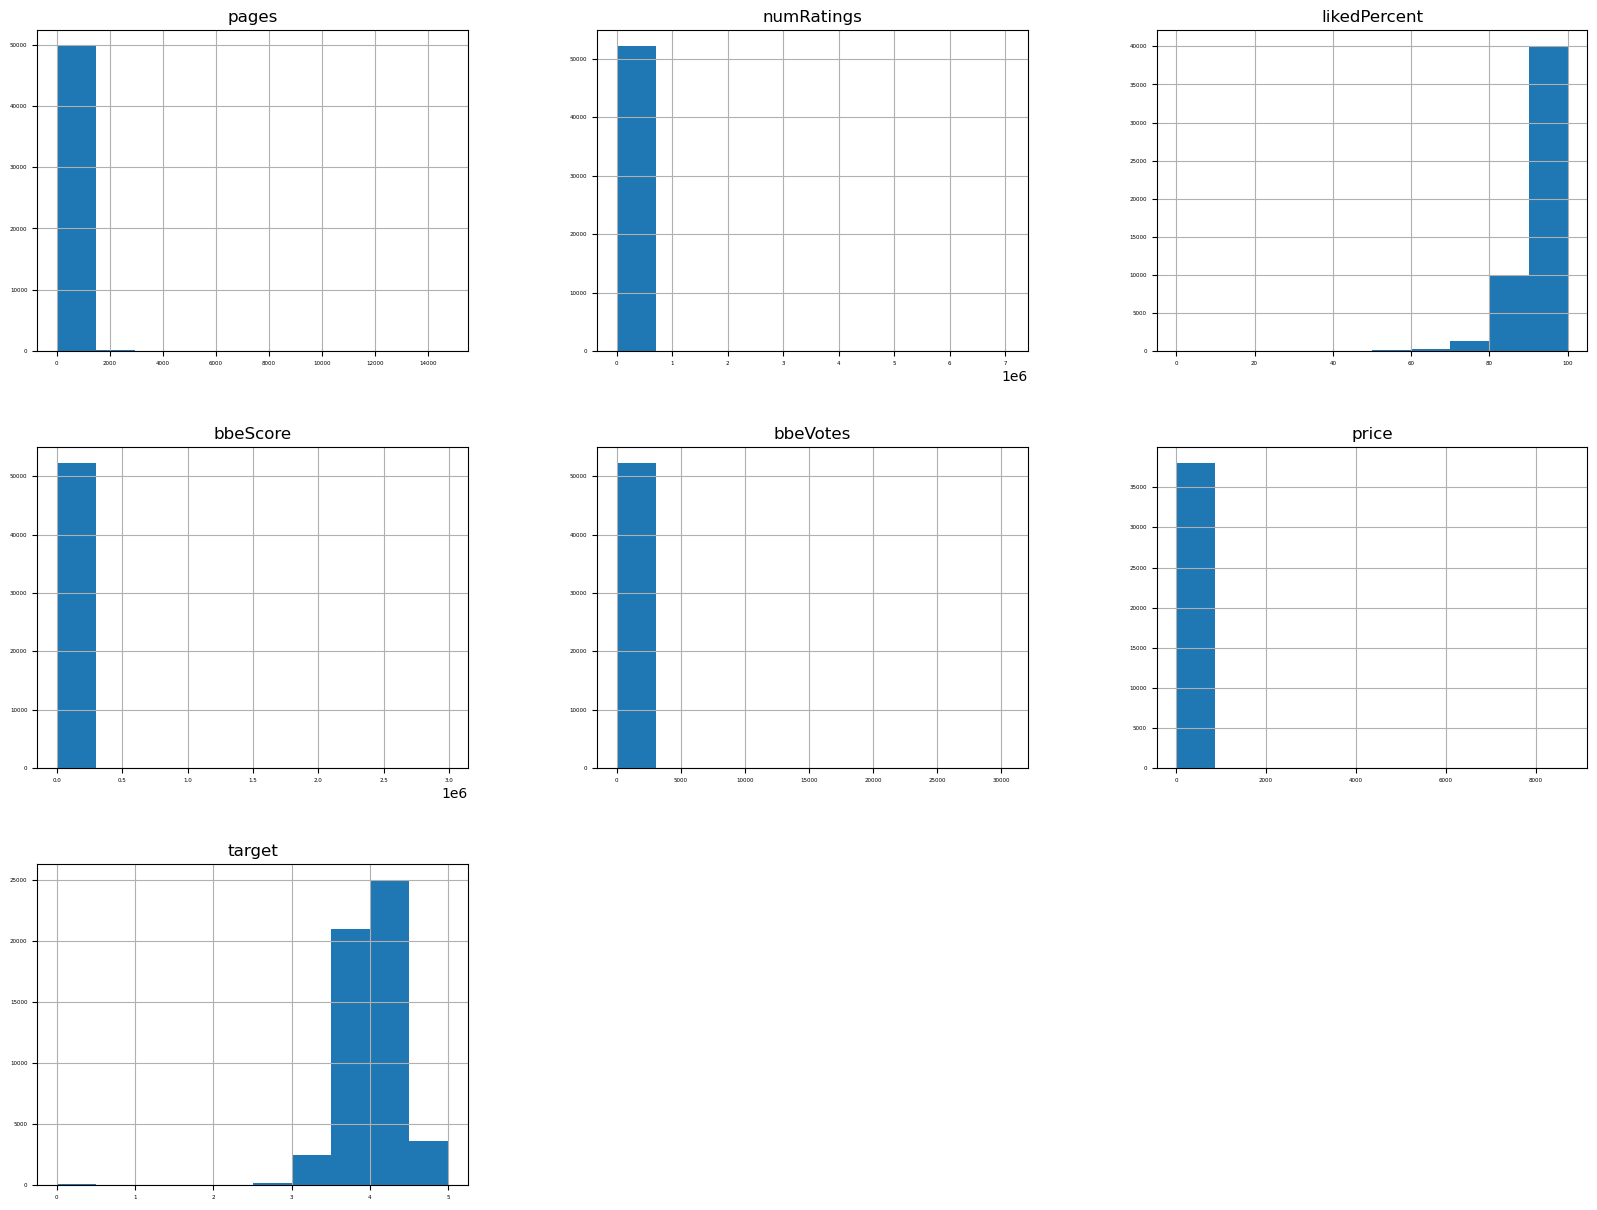

In [333]:
import matplotlib.pyplot as plt

fig = aux.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

Viendo estas distribuciones podemos asverar que tenemos espurios. Quizá de todas, la variable likedPercentage sea la única que se salva. Así que eliminemos los espurios en las otras 5 variables:

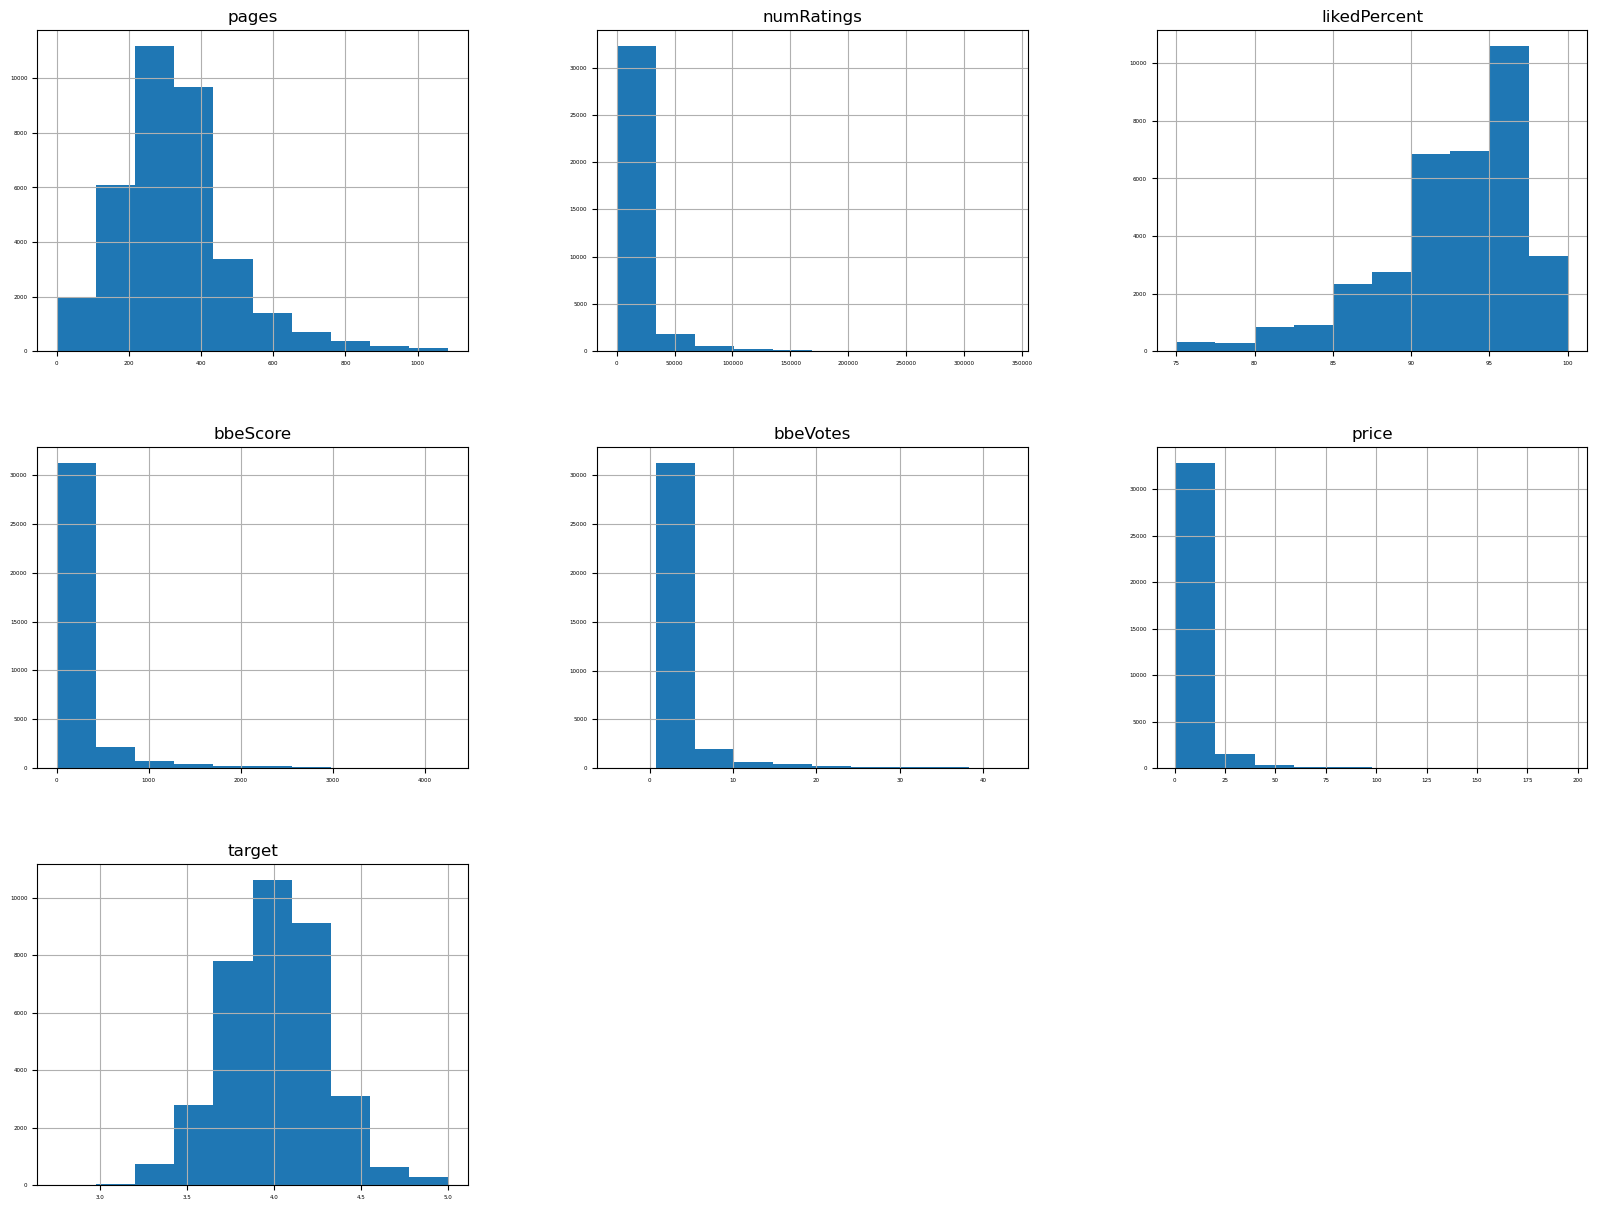

In [334]:
col_num_outlier = X.iloc[:, [3, 7, 8, 9, 10, 11]]

df_SDM = aux.copy()

for elem in col_num_outlier:
    data_mean, data_std = np.mean(df_SDM[elem]), np.std(df_SDM[elem])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    df_SDM = df_SDM[(df_SDM[elem] >= lower) & (df_SDM[elem] <= upper)]
    
fig = df_SDM.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

Vemos que seguimos teniendo distribuciones demasiado influidas por espurios, así que vamos a volver a aplicar el método sobre estas variables.

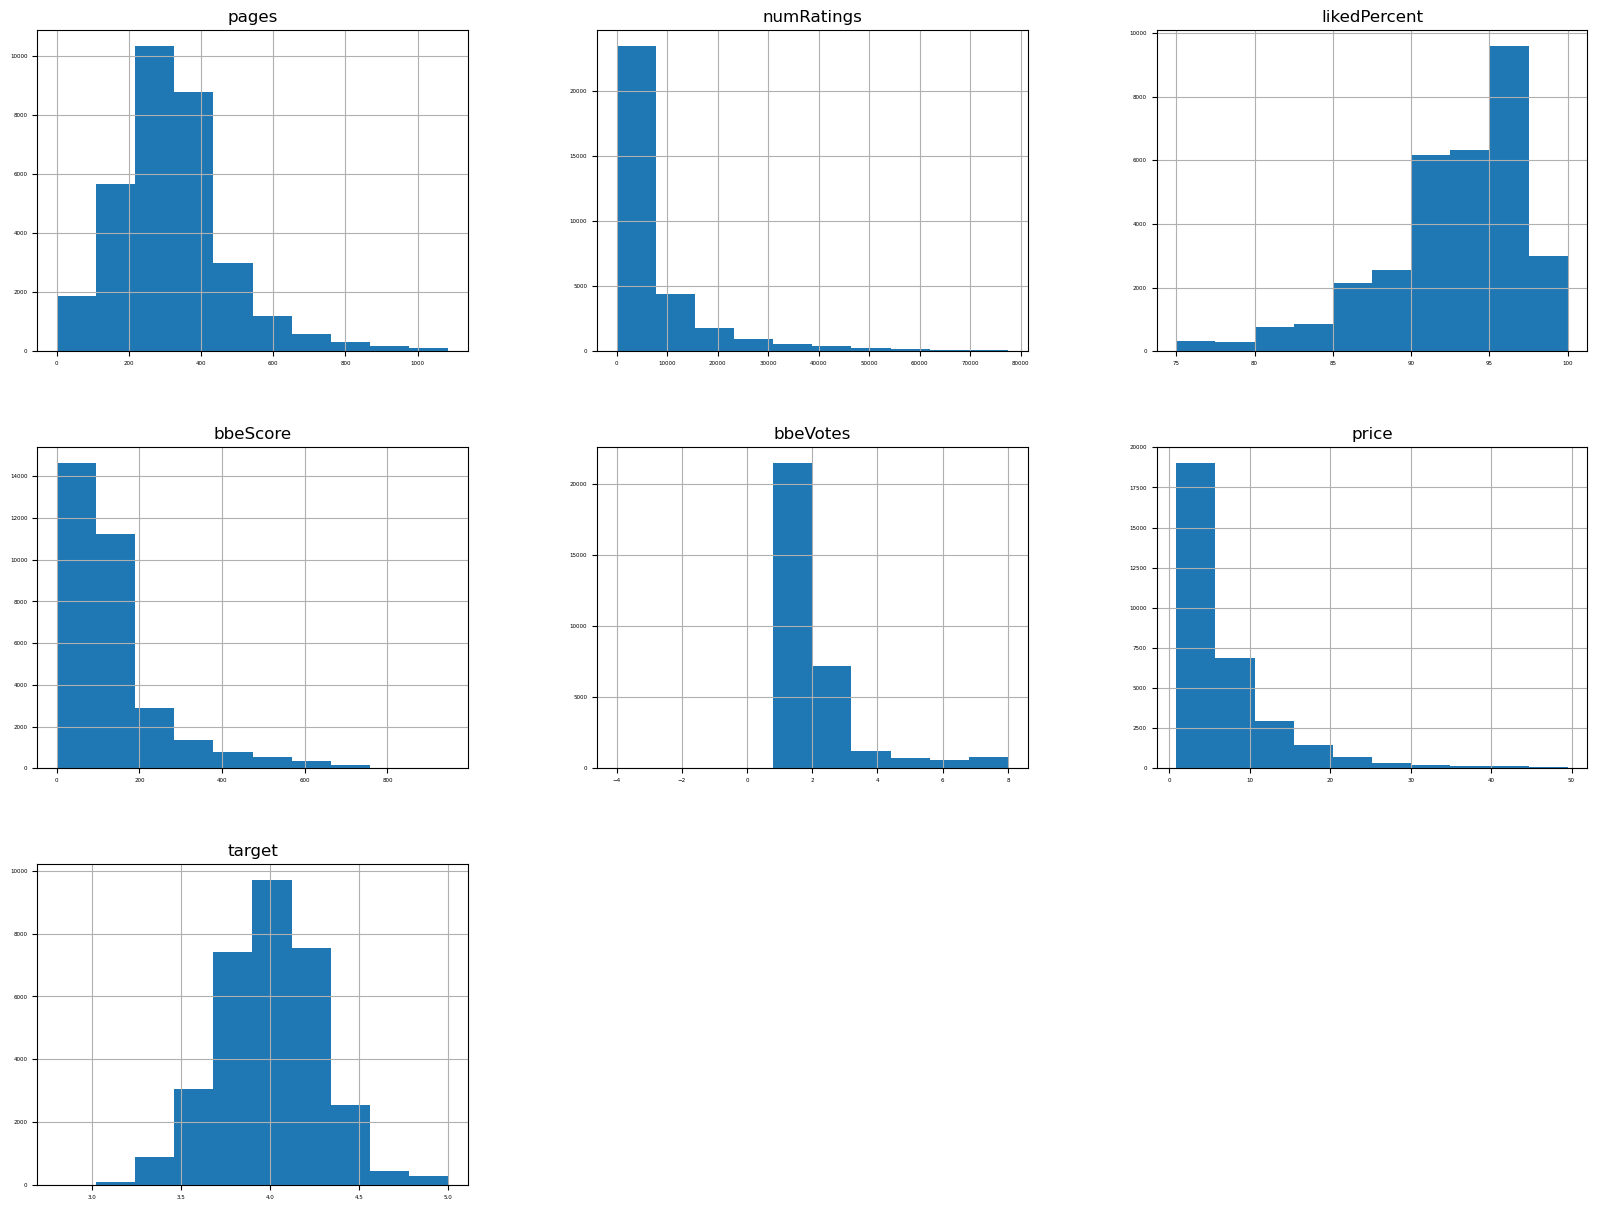

In [335]:
col_num_outlier = X.iloc[:,[7, 9, 10, 11]]

df_SDM_v2 = df_SDM.copy()

for elem in col_num_outlier:
    data_mean, data_std = np.mean(df_SDM_v2[elem]), np.std(df_SDM_v2[elem])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    df_SDM_v2 = df_SDM_v2[(df_SDM_v2[elem] >= lower) & (df_SDM_v2[elem] <= upper)]
    
fig = df_SDM_v2.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

In [336]:
df_SDM_v2.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,target
count,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000
mean,320.641560,6954.399725,92.516361,137.191924,1.737038,7.241371,3.996097
std,153.003806,10831.793018,4.662656,117.689877,1.427712,6.670252,0.285179
min,0.000000,1.000000,75.000000,0.000000,-4.000000,0.840000,2.800000
25%,224.000000,627.000000,90.000000,80.000000,1.000000,3.210000,3.810000
50%,309.000000,2732.000000,94.000000,96.000000,1.000000,5.200000,4.000000
75%,390.000000,8340.000000,96.000000,163.000000,2.000000,8.460000,4.180000
max,1085.000000,77470.000000,100.000000,947.000000,8.000000,49.520000,5.000000


Como podemos ver el valor negativo de bbeVotes está perjudicando a nuestro dataset, así que lo vamos a eliminar.

In [337]:
df_SDM_v2 = df_SDM_v2[(df_SDM_v2['bbeVotes'] > 0)]
df_SDM_v2.describe()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,target
count,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000,31952.000000
mean,320.648128,6957.298479,92.515210,137.250689,1.741519,7.240826,3.995979
std,152.974943,10834.566727,4.660697,117.759209,1.423327,6.670671,0.285119
min,0.000000,1.000000,75.000000,0.000000,1.000000,0.840000,2.800000
25%,224.000000,627.000000,90.000000,80.000000,1.000000,3.210000,3.810000
50%,309.000000,2732.500000,94.000000,96.000000,1.000000,5.200000,4.000000
75%,390.000000,8344.000000,96.000000,163.000000,2.000000,8.460000,4.180000
max,1085.000000,77470.000000,100.000000,947.000000,8.000000,49.520000,5.000000


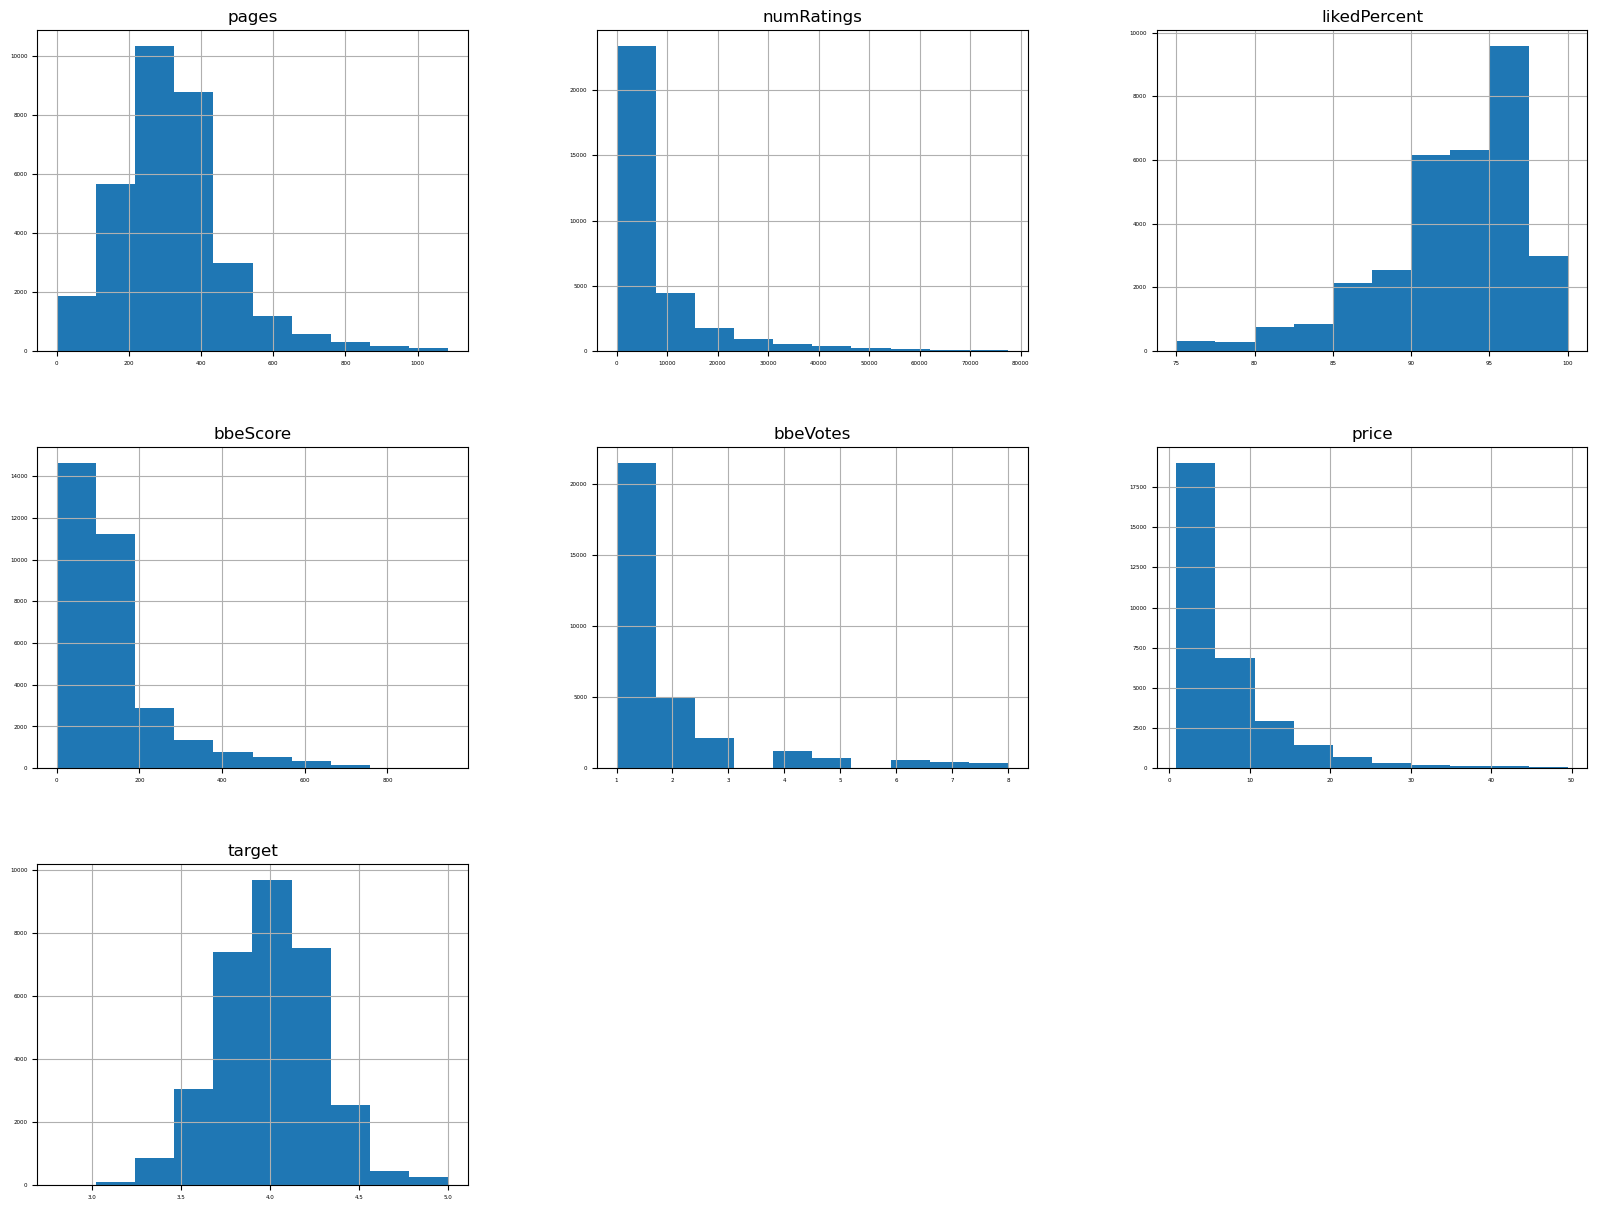

In [338]:
fig = df_SDM_v2.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

In [339]:
df_SDM_v2.shape

(31952, 16)

Vemos que hemos eliminado muchos datos, pero seguimos teniendo una grandísima cantidad de estos. Además, ahora podemos ver bien las distribuciones de nuestros datos.

##### 2.2.1.2. Identificación de outliers mediante el Interquartile Range Method (IQR)

In [341]:
df_IQR = aux.copy()

for i in df_IQR.iloc[:, [3, 7, 8, 9, 10, 11]]:
    print(i)
    datos = df_IQR[[i]].values.astype('int64')
    
    q25, q75 = np.percentile(datos, 25), np.percentile(datos, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in datos if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    df_IQR = df_IQR[(df_IQR[i] >= lower) & (df_IQR[i] <= upper)]

pages
Percentiles: 25th=194.000, 75th=385.000, IQR=191.000
Identified outliers: 4566
numRatings
Percentiles: 25th=402.000, 75th=9972.000, IQR=9570.000
Identified outliers: 5994
likedPercent
Percentiles: 25th=89.000, 75th=96.000, IQR=7.000
Identified outliers: 1878
bbeScore
Percentiles: 25th=81.000, 75th=134.000, IQR=53.000
Identified outliers: 5268
bbeVotes
Percentiles: 25th=1.000, 75th=1.000, IQR=0.000
Identified outliers: 6166
price
Percentiles: 25th=-9223372036854775808.000, 75th=6.000, IQR=9223372036854775808.000
Identified outliers: 0


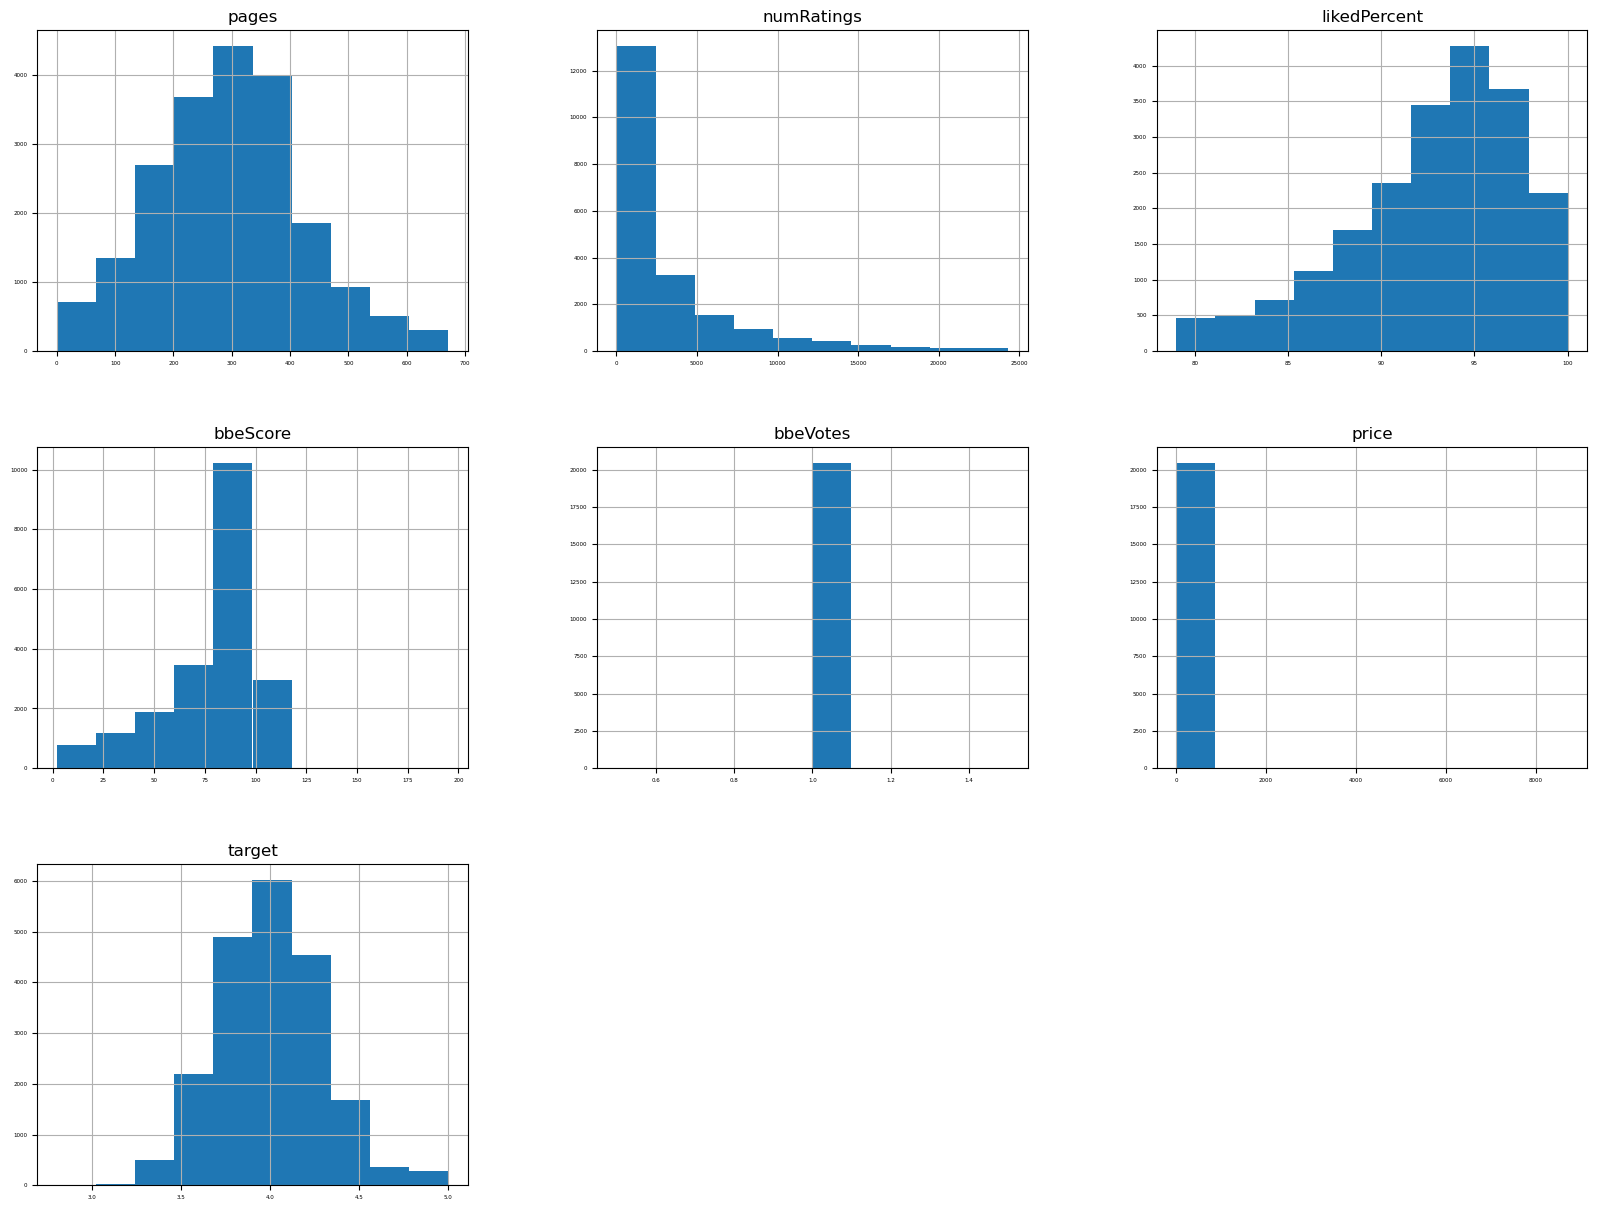

In [342]:
fig = df_IQR.hist(figsize=[20,15], xlabelsize=4, ylabelsize=4)

plt.show()

Vemos que este método no sabe gestionar espurios muy exagerados como los que encontramos en nuestro problema.

##### 2.2.1.3. Borrado automático de outliers mediante el Local Outlier Factor (LOF)

In [344]:
from sklearn.neighbors import LocalOutlierFactor

X = aux.iloc[:, [3, 7, 8, 9, 10, 11]]
y = aux.iloc[:,-1]

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
yhat = yhat[yhat == -1]
len(yhat)

ValueError: Input X contains NaN.
LocalOutlierFactor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Vemos que no podemos usar este método porque contiene 'NaN' así que vamos a hacer un parón y volver a utilizarlo más adelante, después del apartado 2.3. de imputación de nulos.

#### 2.2.2. Valores perdidos

##### 2.2.2.1. Identificación de valores perdidos

In [345]:
num_nulls = (aux.isnull()).sum()

print(num_nulls)

language             3801
bookFormat           1473
edition             47479
pages                2366
publisher            3692
publishDate           879
firstPublishDate    21303
numRatings              0
likedPercent          621
bbeScore                0
bbeVotes                0
price               14344
author                  0
genres               4620
setting             40858
target                  0
dtype: int64


In [346]:
for i in range(aux.shape[1]):
    n_miss = aux.iloc[:,i].isnull().sum()
    perc = n_miss / aux.shape[0] * 100
    print('> %d \t Missing: %d \t (%.1f%%) \t %s' % (i, n_miss, perc, aux.columns[i]))

> 0 	 Missing: 3801 	 (7.2%) 	 language
> 1 	 Missing: 1473 	 (2.8%) 	 bookFormat
> 2 	 Missing: 47479 	 (90.6%) 	 edition
> 3 	 Missing: 2366 	 (4.5%) 	 pages
> 4 	 Missing: 3692 	 (7.0%) 	 publisher
> 5 	 Missing: 879 	 (1.7%) 	 publishDate
> 6 	 Missing: 21303 	 (40.6%) 	 firstPublishDate
> 7 	 Missing: 0 	 (0.0%) 	 numRatings
> 8 	 Missing: 621 	 (1.2%) 	 likedPercent
> 9 	 Missing: 0 	 (0.0%) 	 bbeScore
> 10 	 Missing: 0 	 (0.0%) 	 bbeVotes
> 11 	 Missing: 14344 	 (27.4%) 	 price
> 12 	 Missing: 0 	 (0.0%) 	 author
> 13 	 Missing: 4620 	 (8.8%) 	 genres
> 14 	 Missing: 40858 	 (77.9%) 	 setting
> 15 	 Missing: 0 	 (0.0%) 	 target


Vemos que tenemos en muchas columnas un grave problema de valores nulos, así que como viene así estructurado en la asignatura en este apartado simplemente vamos a eliminarlos. Más adelante los imputaremos.

##### 2.2.2.2. Borrado de filas con valores nulos

In [347]:
df_noNulls = aux.copy()
df_noNulls.dropna(inplace=True)
#Antes
print(aux.shape)
#Después
print(df_noNulls.shape)

(52428, 16)
(642, 16)


Acabamos, por arte de magia, de erradicar la base de datos. Vamos por tanto a eliminar directamente las columnas que tienen un porcentaje de nulos muy alto y luego volver a aplicar esta estrategia.

In [348]:
aux = aux.drop(['edition', 'firstPublishDate', 'setting'], axis=1)

In [349]:
df_noNulls = aux.copy()
df_noNulls.dropna(inplace=True)
#Antes
print(aux.shape)
#Después
print(df_noNulls.shape)

(52428, 13)
(33848, 13)


Ahora ya obtenemos resultados más lógicos.

### 2.3. Imputación de valores perdidos

En este apartado vamos un poco a ciegas, porque no podemos comprobar que tan bien funciona cada imputación ya que tenemos variables categóricas de las que aún no hemos podido encargarnos. Así que vamos a crear un dataset para cada técnica y los validaremos más adelante.
<br><br>
Además, para todas las variables categóricas aplicaremos 'most_frequent' y el resto de técnicas para las númericas.

#### 2.3.1. Imputación estadística

In [351]:
aux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52428 entries, The Hunger Games to Daughter of Helaman
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      48627 non-null  object 
 1   bookFormat    50955 non-null  object 
 2   pages         50062 non-null  float64
 3   publisher     48736 non-null  object 
 4   publishDate   51549 non-null  object 
 5   numRatings    52428 non-null  int64  
 6   likedPercent  51807 non-null  float64
 7   bbeScore      52428 non-null  int64  
 8   bbeVotes      52428 non-null  int64  
 9   price         38084 non-null  float64
 10  author        52428 non-null  object 
 11  genres        47808 non-null  object 
 12  target        52428 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 5.6+ MB


In [407]:
X_cat = aux.iloc[:, [0, 1, 3, 4, 10, 11]]
X_num = aux.iloc[:, [2, 5, 6, 7, 8, 9]]
y = aux.iloc[:, -1]

In [408]:
X_cat = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(X_cat), columns = X_cat.columns, index=X_cat.index)

In [413]:
from sklearn.impute import SimpleImputer

strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    X_num_imputed = pd.DataFrame(SimpleImputer(strategy=s).fit_transform(X_num), columns = X_num.columns, index=X_num.index)
    exec(f'df_imputed_{s} = pd.concat([X_num_imputed, X_cat, y], axis=1)')

In [420]:
#Probamos cada estrategia:
for s in strategies:
    print(s)
    exec(f'print((df_imputed_{s}.isnull()).sum())')

mean
pages           0
numRatings      0
likedPercent    0
bbeScore        0
bbeVotes        0
price           0
language        0
bookFormat      0
publisher       0
publishDate     0
author          0
genres          0
target          0
dtype: int64
median
pages           0
numRatings      0
likedPercent    0
bbeScore        0
bbeVotes        0
price           0
language        0
bookFormat      0
publisher       0
publishDate     0
author          0
genres          0
target          0
dtype: int64
most_frequent
pages           0
numRatings      0
likedPercent    0
bbeScore        0
bbeVotes        0
price           0
language        0
bookFormat      0
publisher       0
publishDate     0
author          0
genres          0
target          0
dtype: int64
constant
pages           0
numRatings      0
likedPercent    0
bbeScore        0
bbeVotes        0
price           0
language        0
bookFormat      0
publisher       0
publishDate     0
author          0
genres          0
target  

Vemos que está todo perfecto y sin nulos.

#### 2.3.2. Imputación por KNN

Hacemos lo mismo con al estrategia de imputación por KNN, vamos a tener un dataframe para cada KNN desde el 2 al 20 contando de dos en dos.

In [422]:
from sklearn.impute import KNNImputer

strategies = [i for i in range(1,22,2)]
for s in strategies:
    X_num_imputed = pd.DataFrame(KNNImputer(n_neighbors=s).fit_transform(X_num), columns = X_num.columns, index=X_num.index)
    exec(f'df_imputed_KNN{s} = pd.concat([X_num_imputed, X_cat, y], axis=1)')

#### 2.3.3. Outliers con LOF

Ya que en el momento de hacer el eliminado de espurios con el método LOF no hemos podido porque teniamos valores faltantes, lo retomamos en este apartado. Por simplificar las cosas vamos a dar por hecho que el que utiliza la media para imputar los valores faltantes numéricos es el mejor, y es el que vamos a utilizar para eliminar los espurios.

In [429]:
from sklearn.neighbors import LocalOutlierFactor

X = df_imputed_mean.iloc[:, [0, 1, 2, 3, 4, 5]]
y = df_imputed_mean.iloc[:,-1]

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
yhat = yhat[yhat == -1]
len(yhat)

1573

In [469]:
yhat = lof.fit_predict(X)
df_fin_3 = df_imputed_mean[yhat == 1]
df_fin_3.shape

(50855, 13)

In [451]:
df_fin_3.head()

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,language,bookFormat,publisher,publishDate,author,genres,target
title,,,,,,,,,,,,,
The Book Thief,552.0,1834276.0,96.0,1372809.0,14168.0,3.800000,English,Hardcover,Alfred A. Knopf,03/14/06,Markus Zusak (Goodreads Author),Historical Fiction,4.37
Animal Farm,141.0,2740713.0,91.0,1276599.0,13264.0,4.420000,English,Mass Market Paperback,Signet Classics,04/28/96,George Orwell,Classics,3.95
Gone with the Wind,1037.0,1074620.0,94.0,1087732.0,11211.0,5.580000,English,Mass Market Paperback,Warner Books,04/01/99,Margaret Mitchell,Classics,4.30
The Hitchhiker's Guide to the Galaxy,193.0,1436325.0,94.0,1063601.0,10996.0,10.416236,English,Paperback,Del Rey,06/23/07,Douglas Adams,Science Fiction,4.22
The Giving Tree,64.0,905731.0,94.0,1021534.0,10594.0,4.870000,English,Hardcover,HarperCollins Publishers,10/07/64,Shel Silverstein,Childrens,4.37


### 2.4. Ordinal Encoding y One Hot Encoding

Para este apartado, vamos a determinar primero qué variables serán transformadas con OrdinalEncoder y cuales con One Hot Encoding.
<br><br>
Para OneHotEncoder:
   - language, 
   - bookFormat, 
   - publisher, 
   - author,
   - genres


Para OrdinalEncoder:
   - publishDate

In [437]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['language', 'bookFormat', 'publisher', 'author', 'genres']
onehot_encoder = OneHotEncoder(sparse=False)
feature_arr = onehot_encoder.fit_transform(df_fin_3[cat_cols])
feature_labels = onehot_encoder.categories_
feature_labels = np.array(feature_labels).ravel()
features = pd.DataFrame(feature_arr, columns=feature_labels)

df_fin_3.drop(cat_cols, axis=1, inplace=True)
df_fin_3 = pd.Concat([df_fin_3,features], axis=1)

MemoryError: Unable to allocate 13.0 GiB for an array with shape (50855, 34372) and data type float64

Vaya vaya, vemos que tenemos tantísimos valores distintos en nuestros datos categóricos que no podemos hacer esto. Así que haremos un Ordinal encoder para todos y nos curamos en disgustos.

In [471]:
from sklearn.preprocessing import OrdinalEncoder

pd.options.mode.chained_assignment = None 
cat_cols = ['language', 'bookFormat', 'publisher', 'author', 'genres', 'publishDate']
ord_enc = OrdinalEncoder()
feature_arr = ord_enc.fit_transform(df_fin_3[cat_cols])
features = pd.DataFrame(feature_arr, columns=cat_cols, index=df_fin_3.index)

df_fin_3.drop(cat_cols, axis=1, inplace=True)
df_fin_3 = pd.concat([df_fin_3,features], axis=1)

In [472]:
df_fin_3

,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,target,language,bookFormat,publisher,author,genres,publishDate
title,,,,,,,,,,,,,
The Book Thief,552.0,1834276.0,96.0,1372809.0,14168.0,3.800000,4.37,22.0,41.0,270.0,14195.0,179.0,117.0
Animal Farm,141.0,2740713.0,91.0,1276599.0,13264.0,4.420000,3.95,22.0,57.0,8087.0,7159.0,76.0,184.0
Gone with the Wind,1037.0,1074620.0,94.0,1087732.0,11211.0,5.580000,4.30,22.0,57.0,9461.0,13850.0,76.0,147.0
The Hitchhiker's Guide to the Galaxy,193.0,1436325.0,94.0,1063601.0,10996.0,10.416236,4.22,22.0,72.0,2305.0,5414.0,328.0,275.0
The Giving Tree,64.0,905731.0,94.0,1021534.0,10594.0,4.870000,4.37,22.0,41.0,4010.0,19429.0,65.0,465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unbelievable,360.0,1028.0,94.0,0.0,1.0,19.180000,4.16,22.0,72.0,9676.0,19467.0,317.0,767.0
Anasazi,190.0,37.0,95.0,0.0,1.0,10.416236,4.19,22.0,72.0,1280.0,6131.0,259.0,2195.0
Marked,280.0,6674.0,84.0,0.0,1.0,7.370000,3.70,22.0,72.0,2009.0,12032.0,139.0,6486.0


Por fin tenemos nuestro dataframe limpio, codificado, sin nulos ni espurios. Vamos a ver qué valor nos da un random forest:

In [474]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = df_fin_3.values

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regr = RandomForestRegressor(random_state=1)
regr.fit(X_train, y_train)

yhat = regr.predict(X_test)

accuracy = mean_squared_error(y_test, yhat)
print('RMSE: %.2f' % (accuracy*100))

RMSE: 903847444.19


## 3. Conclusiones